In [158]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt 
import statsmodels.api as sm

df = pd.read_csv('aggregated_hemnet.csv').drop('Unnamed: 0', axis=1)
df = df.drop('index', axis=1)

df.columns = ['date', 'area', 'price_sqm', 'asking_price', 'nbr_rooms',
       'living_space', 'rent', 'additional', 'year_built', 'closing_price',
       'bi_area', 'price_inc_percent']

df['date_dt'] = pd.to_datetime(df.date)

area = 'ostermalm'

df.area.value_counts()

price = df.loc[df.area==area].price_sqm
price.index = df.loc[df.area==area].date_dt

price = price.resample('10D').mean()

In [159]:
cutoff = price[price.isna()].tail().index.values[0]

In [160]:
cutoffprice[price.isna()].tail().index

numpy.datetime64('2017-07-19T00:00:00.000000000')

In [161]:
price = price.loc[price.index > cutoff]

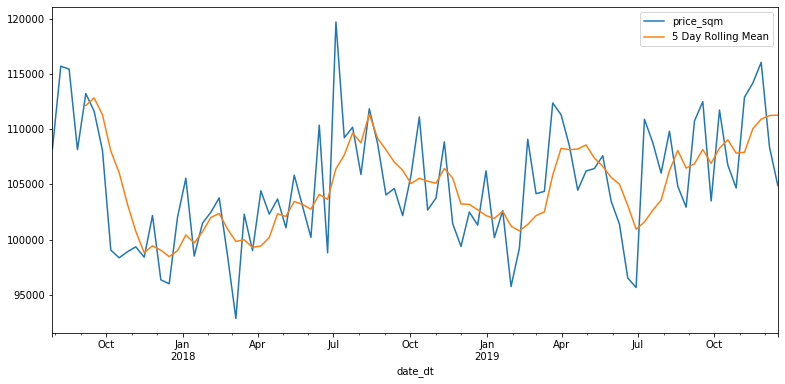

In [162]:
fig = plt.figure(figsize=(13,6))
price.plot()
price.rolling(5).mean().plot(label='5 Day Rolling Mean')
plt.legend()
plt.show()

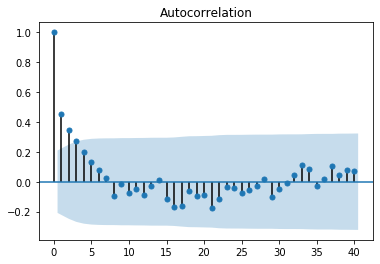

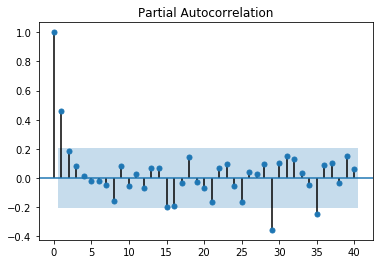

In [163]:
#fig, axs = plt.subplots(1,2) 
sm.graphics.tsa.plot_acf(price, lags=40)
sm.graphics.tsa.plot_pacf(price, lags=40)
plt.show()

In [110]:
axs

array([<Figure size 432x288 with 1 Axes>,
       <Figure size 432x288 with 1 Axes>], dtype=object)

In [ ]:

#scaler = PowerTransformer(method='box-cox', standardize=False)
#p_scaled = pd.Series(scaler.fit_transform(price.values.reshape(-1,1)).flatten())
#p_scaled.index = price.index
